# EDA for milestone 1

## Dataset 1 - pldb.csv

This dataset contains extensive information on 4,776 programming languages, with 353 distinct features. These features are categorized into non-technical and technical information. Examples of non-technical information include the year of appearance, the number of published papers, and the country where the programming language was developed. Technical information includes features such as whether the language supports exceptions, pointers, or directives. Our investigation and visualizations primarily focus on the non-technical aspects of programming languages; therefore, exploratory data analysis (EDA) was conducted on these columns.

Source: https://www.kaggle.com/datasets/sujaykapadnis/programming-language-database

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("pldb.csv")
df.head()

,title,appeared,type,pldbId,rank,languageRank,factCount,lastActivity,exampleCount,bookCount,...,features.hasIds,ebook,features.hasExports,features.hasZippers,features.hasMonads,extensionOf,zulip,features.hasImplicitArguments,features.hasDynamicTyping,features.hasMethodChaining
0,Java,1995,pl,java,0,0.0,920,2022,20,401,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JavaScript,1995,pl,javascript,1,1.0,818,2022,54,351,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True
2,C,1972,pl,c,2,2.0,426,2022,26,78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Python,1991,pl,python,3,3.0,691,2022,35,342,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SQL,1974,queryLanguage,sql,4,4.0,324,2022,6,182,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Numerical Columns

- Number of programming language users
- Github big query repositories
- Number of books related to each programming languages
- Number of papers published about the programming languages
- Number of jobs utilizing each programming languages
- Number of wikipedia views about the programming language each day
- Number of Github repositories written in the programming language
- Number of trending projects in Github with the programming language

In [57]:
def show(col):
  top_30_users = df.sort_values(by=col, ascending=False).head(30)

  plt.figure(figsize=(12, 8))
  sns.barplot(y="title", x=col, data=top_30_users, palette="viridis")
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel("Language")

  for i, v in enumerate(top_30_users[col]):
      plt.text(v, i, str(v), color='black', ha='left', va='center')
  plt.show()

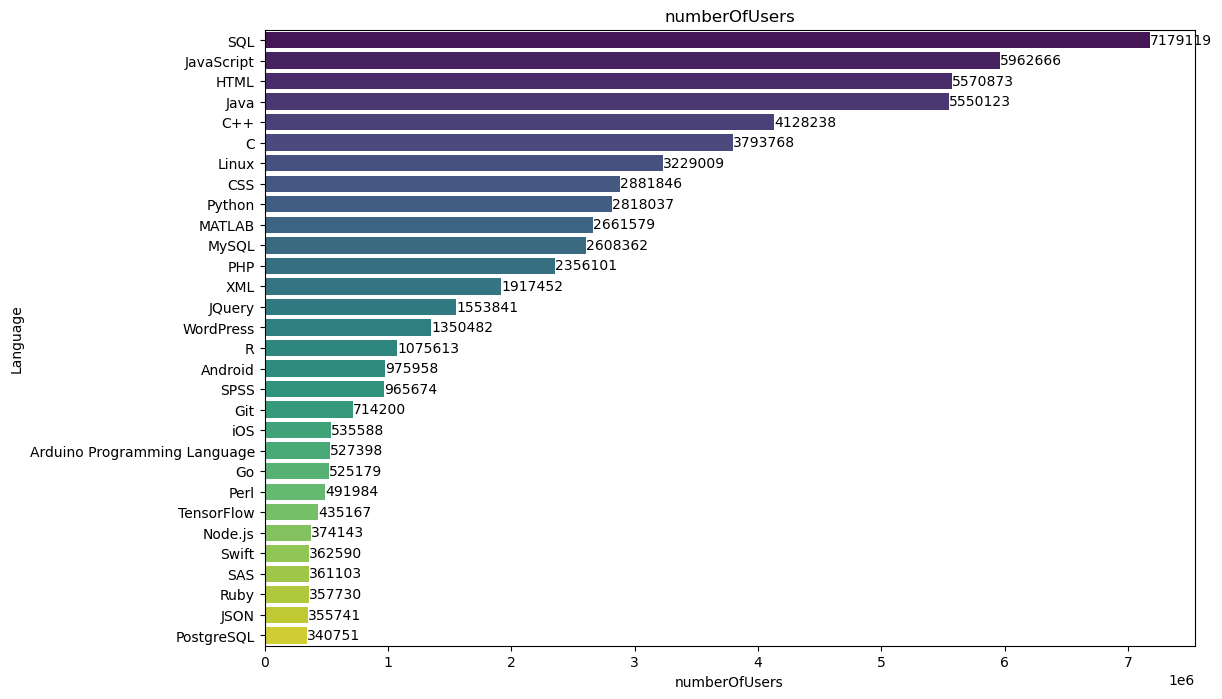

In [58]:
show("numberOfUsers")

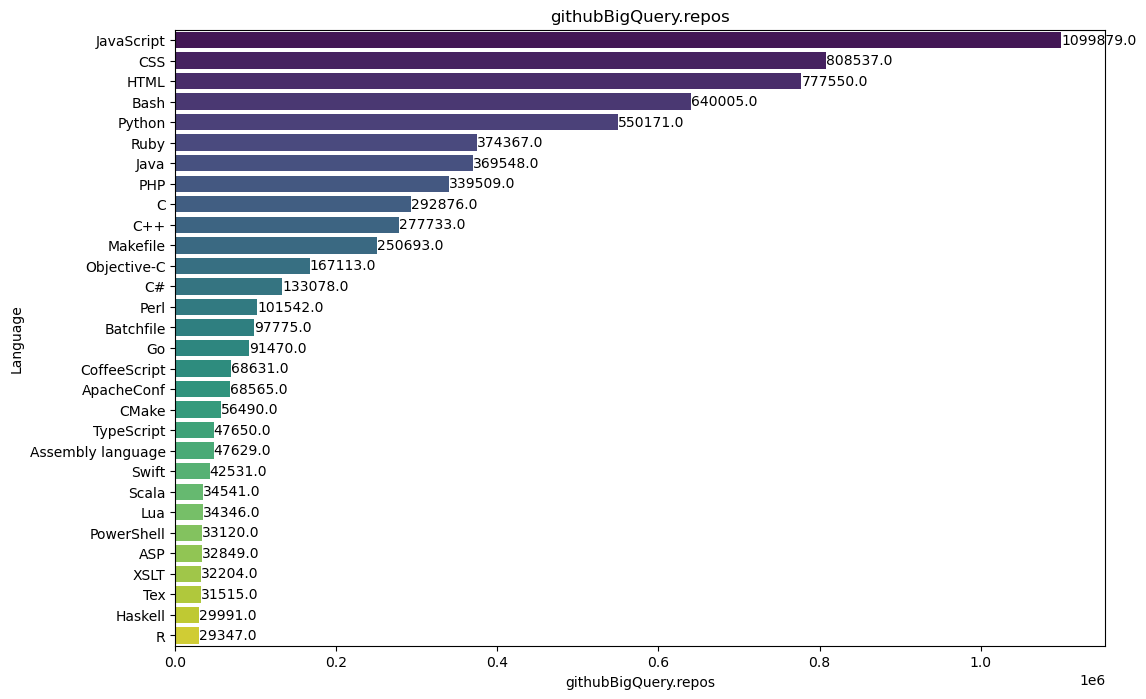

In [59]:
show("githubBigQuery.repos")

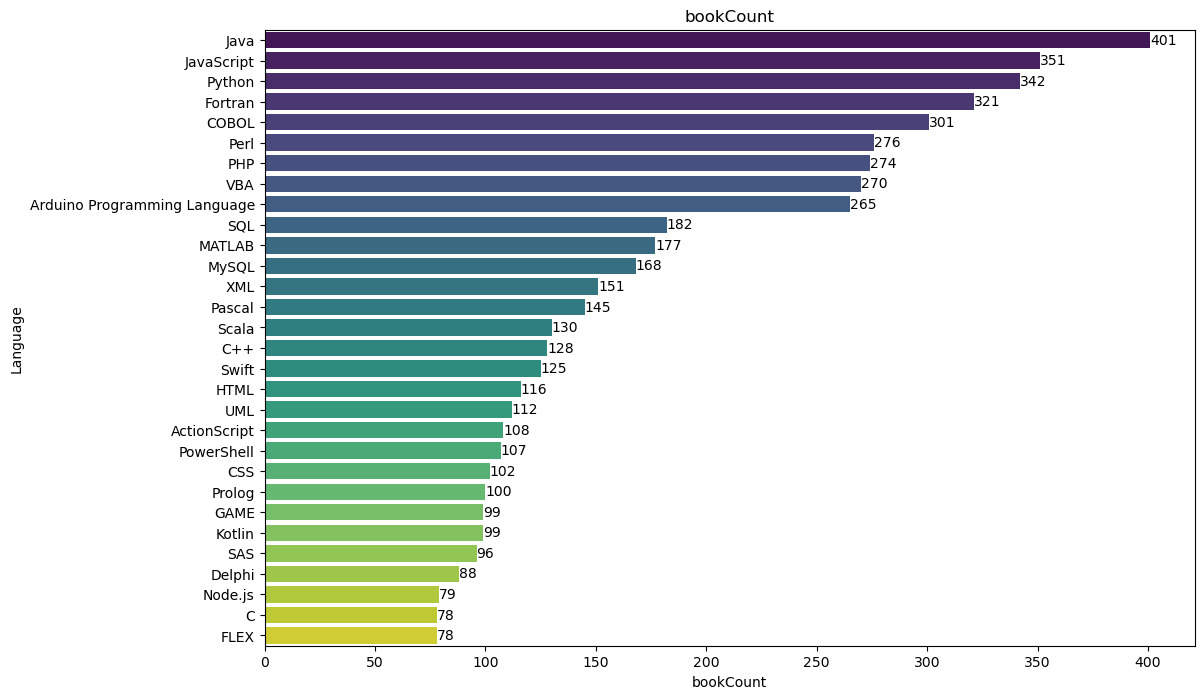

In [60]:
show("bookCount")

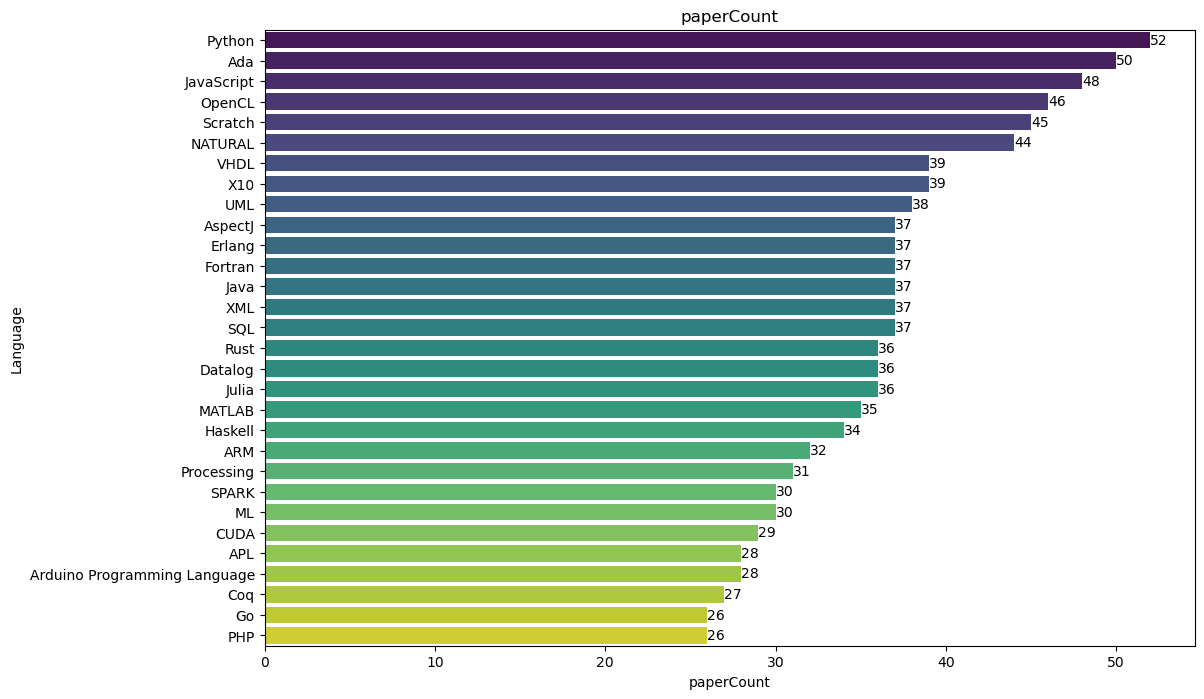

In [61]:
show("paperCount")

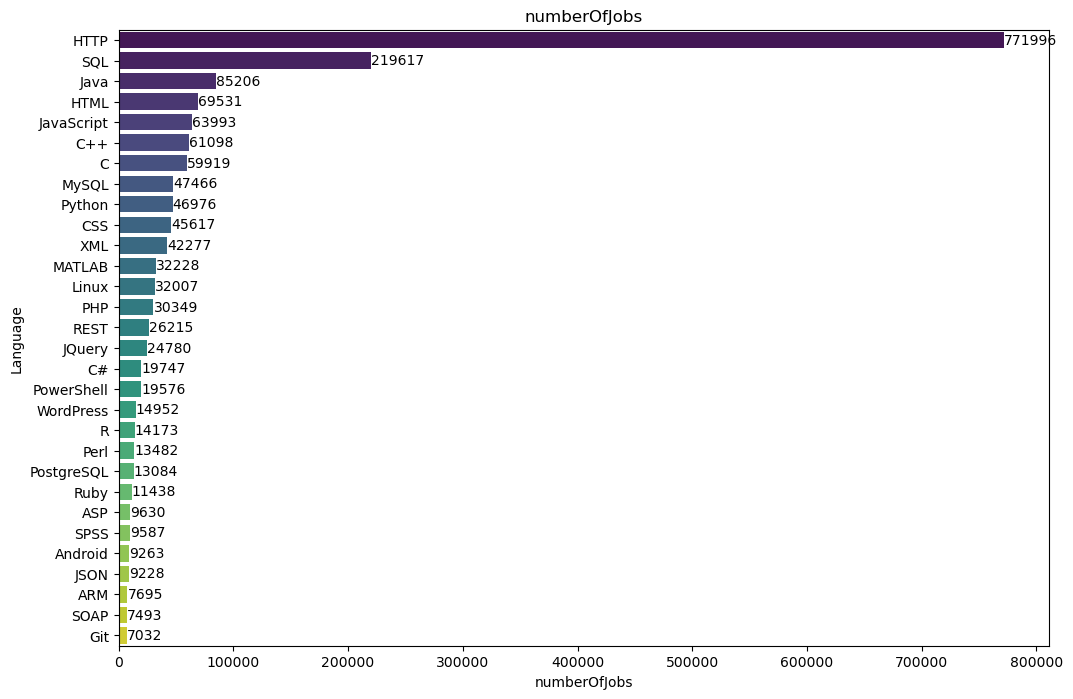

In [62]:
show("numberOfJobs")

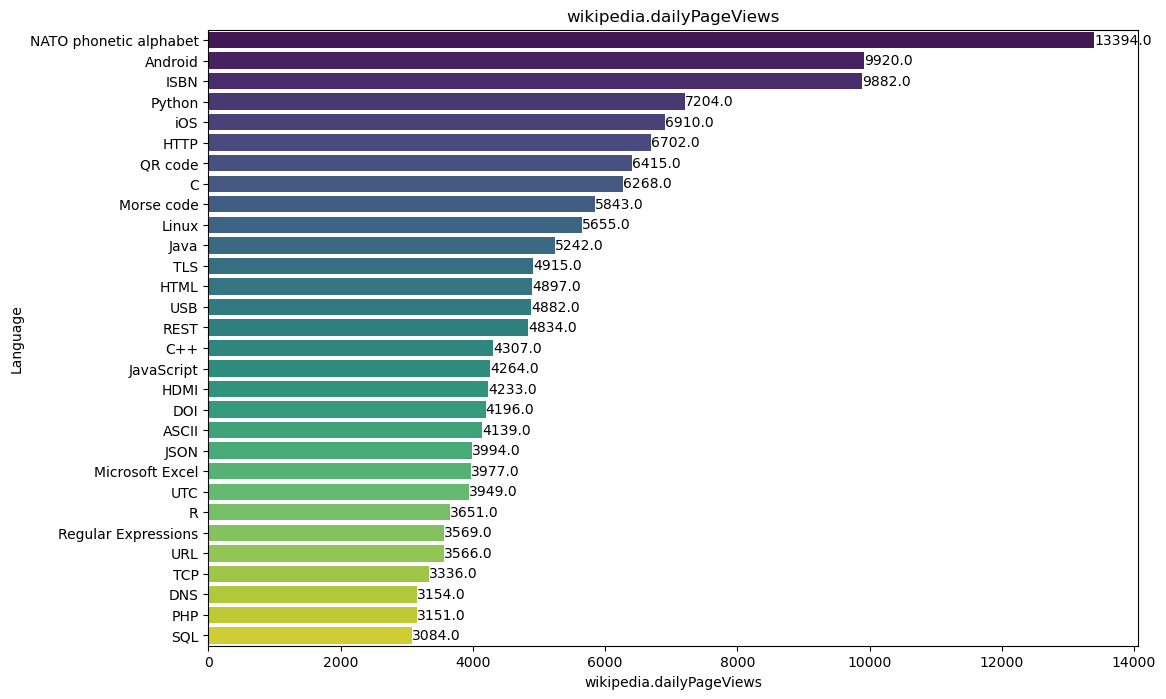

In [63]:
show("wikipedia.dailyPageViews")

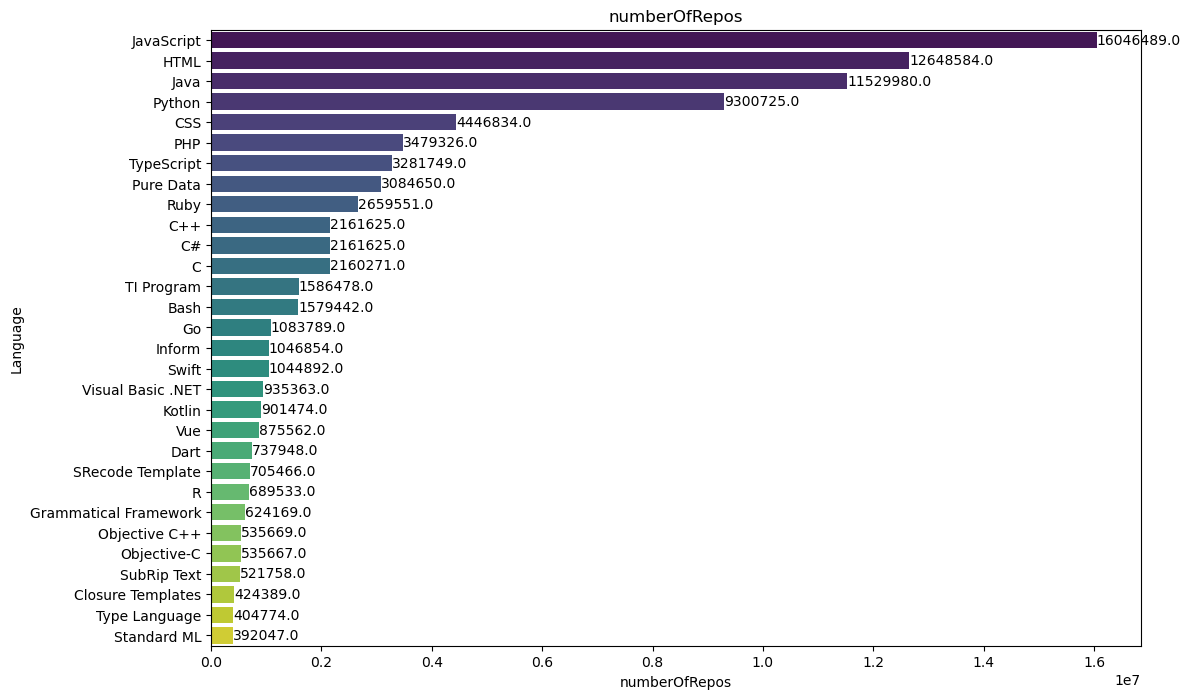

In [64]:
show("numberOfRepos")

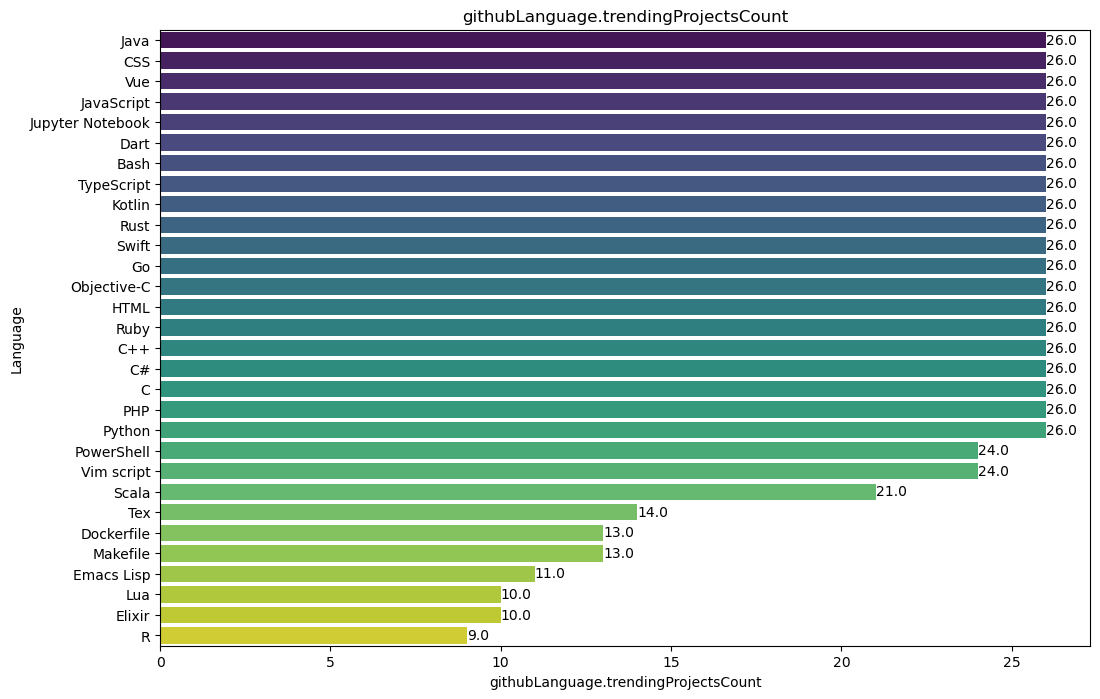

In [65]:
show("githubLanguage.trendingProjectsCount")

### Categorical Columns

- Number of programming languages developed from each countries
- Number of programmin languages developed since 1950

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

def show_cat(column_name, flabel, nlargest):
    try:
        value_counts = df[column_name].value_counts().nlargest(nlargest)

        plt.figure(figsize=(10, 6))
        plt.bar(value_counts.index, value_counts.values)
        plt.xlabel(column_name)
        plt.ylabel("Frequency")
        plt.title(f"Top {nlargest} Frequencies of {column_name}")
        plt.xticks(rotation=45, ha='right') 

        if flabel:
          for i, v in enumerate(value_counts.values):
              plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=8)

        plt.tight_layout()
        plt.show()
    except KeyError:
        print(f"Error: Column '{column_name}' not found in the DataFrame.")
    except Exception as e:
        print(f"An error occurred: {e}")

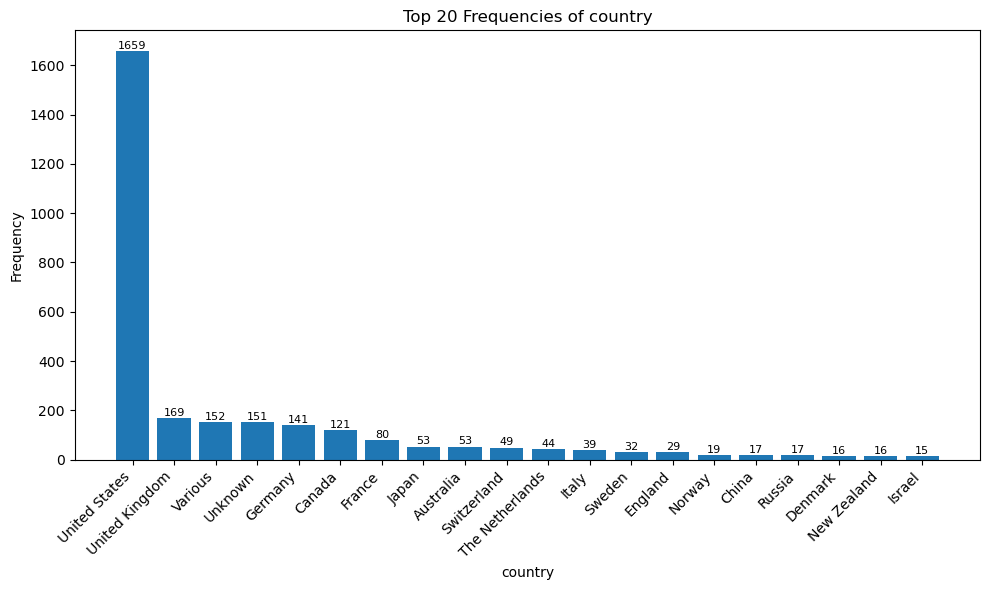

In [67]:
show_cat("country", True, 20)

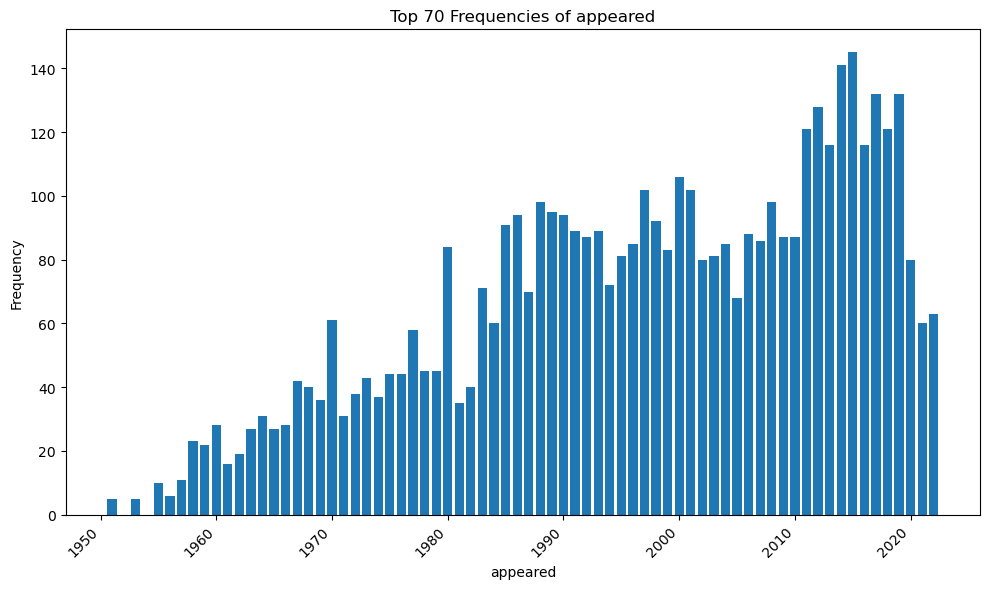

In [68]:
show_cat('appeared', False, 70)

## Dataset 2: plpop.csv

This dataset contains data about the Most Popular Programming Languages from 2004 to 2024. All Programming Languages values are in percentage form out of 100 %. The data was pulled from https://pypl.github.io.


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.cm as cm

warnings.filterwarnings('ignore')

df = pd.read_csv('plpop.csv')
df.head()

,Date,Abap,Ada,C/C++,C#,Cobol,Dart,Delphi/Pascal,Go,Groovy,...,Powershell,Python,R,Ruby,Rust,Scala,Swift,TypeScript,VBA,Visual Basic
0,July 2004,0.34,0.36,10.01,4.68,0.42,0.0,2.80,0.0,0.03,...,0.16,2.51,0.39,0.33,0.24,0.17,0.0,0.0,1.43,8.50
1,August 2004,0.35,0.36,9.74,4.96,0.46,0.0,2.65,0.0,0.07,...,0.15,2.62,0.40,0.40,0.19,0.17,0.0,0.0,1.45,8.51
2,September 2004,0.41,0.41,9.59,5.04,0.51,0.0,2.64,0.0,0.08,...,0.08,2.71,0.40,0.41,0.17,0.13,0.0,0.0,1.54,8.38
3,October 2004,0.40,0.38,9.47,5.29,0.53,0.0,2.76,0.0,0.09,...,0.12,2.91,0.42,0.46,0.12,0.14,0.0,0.0,1.61,8.46
4,November 2004,0.38,0.38,9.48,5.22,0.55,0.0,2.75,0.0,0.07,...,0.12,2.83,0.41,0.44,0.17,0.15,0.0,0.0,1.50,8.21


In [70]:
def show(df, drop_value):

  column_means = df.drop('Date', axis=1).mean()

  columns_to_drop = column_means[column_means < drop_value].index

  df = df.drop(columns=columns_to_drop)

  plt.figure(figsize=(12, 6))

  # Generate distinct colors for each column
  colors = cm.get_cmap('tab20', len(df.columns[1:]))

  # Plot each line with a unique color
  for i, cols in enumerate(df.columns[1:]):
      plt.plot(df['Date'], df[cols], label=cols, color=colors(i))

  plt.xlabel('Date')
  plt.ylabel('Value')
  plt.title(f'Popularity {len(df.columns)-1} most popular programming langauges Over Time')

  # Organize legend into multiple columns
  plt.legend(ncol=3, fontsize='small', bbox_to_anchor=(1.05, 1), loc='upper left')

  plt.xticks([])  # Hide x-axis values
  plt.grid(True)
  plt.tight_layout()
  plt.show()

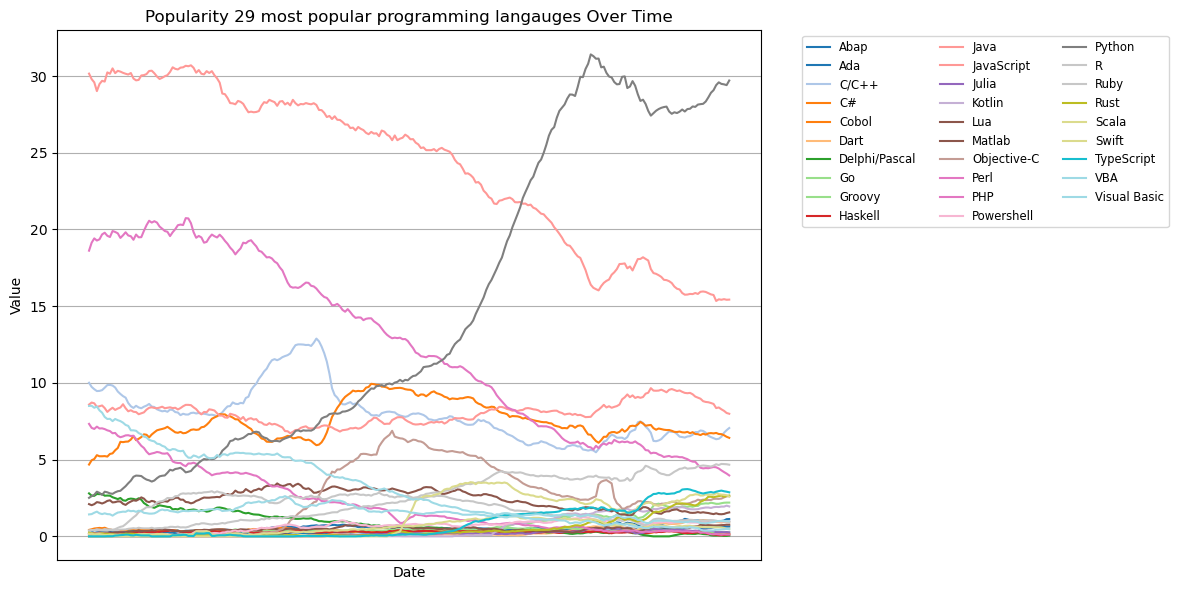

In [71]:
show(df, 0)

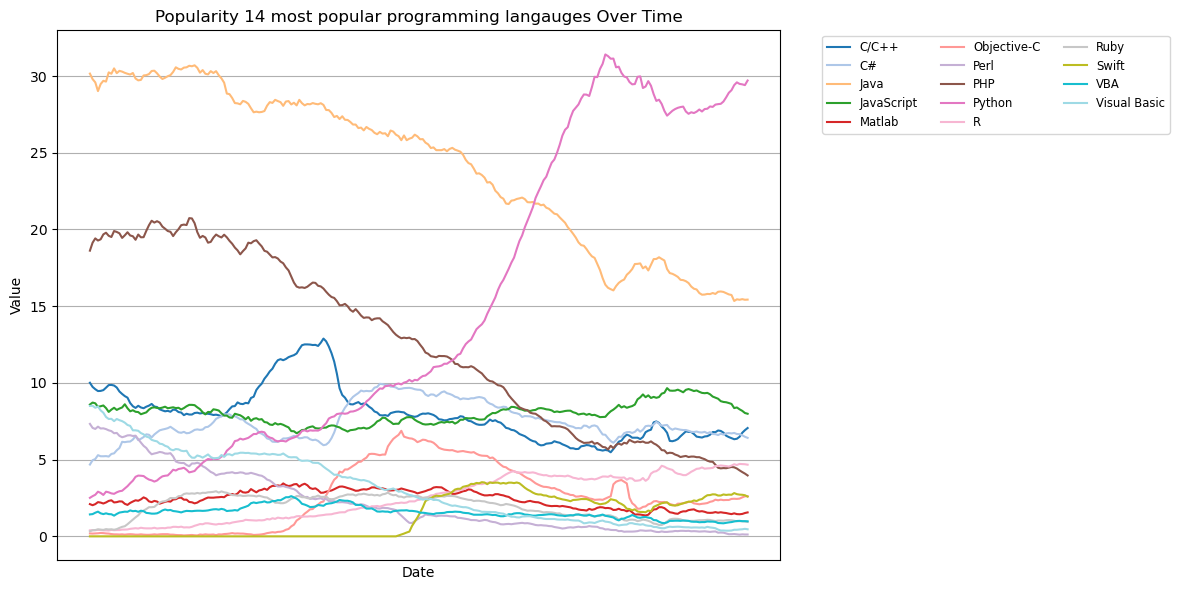

In [72]:
show(df, 1)

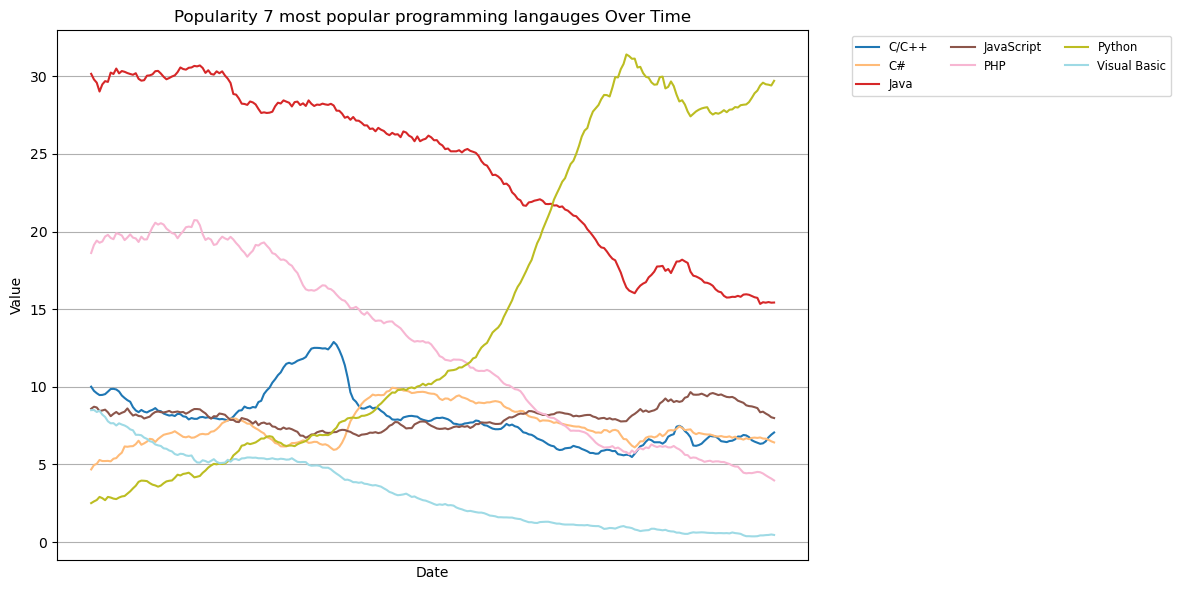

In [73]:
show(df,3)

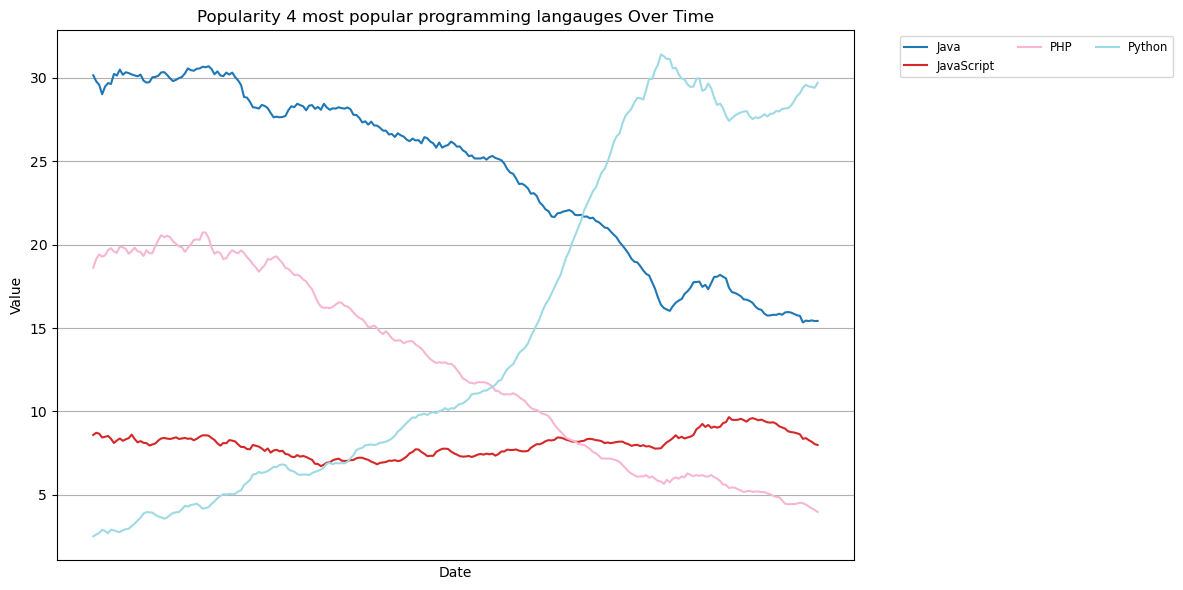

In [74]:
show(df,8)